In [1]:
import tweepy

with open("D:/github/twitter.txt", encoding="utf8") as f:
    client = tweepy.Client(f.readline().strip())

In [19]:
import os
os.path.abspath(os.getcwd())

'd:\\github\\coding-academy\\courses\\crowling\\d087'

In [85]:
keyword = "파이썬"
raw_data = tweepy.Paginator(client.search_recent_tweets, keyword, tweet_fields=["created_at"], max_results=100, limit=10).flatten()
tweet_data = list(map(dict, raw_data))
print(len(tweet_data))

602


In [ ]:
for i in tweet_data:
    print(i)

In [21]:
korean_stopwords_path = "../../../projects/webcrawling/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = set(map(lambda x:x.strip(), f.readlines()))

In [86]:
from apyori import apriori
from konlpy.tag import Okt
import re
from pprint import pprint

not_hangul = re.compile("[^가-힣]")
raw_tweet_nouns = list(map(lambda x:Okt().nouns(not_hangul.sub(" ", x["text"])),tweet_data))
filtered_tweet_nouns = [[noun for noun in nouns if len(noun)>1 and noun not in stopwords] for nouns in raw_tweet_nouns]
transactions = filtered_tweet_nouns
# print(transactions)
results = list(apriori(transactions,
                       min_support=0.05,
                       min_confidence=0.1,
                       min_lift=5,
                       max_length=2))
for result in results:
    print([*result[0], result[1]], result)
    # support

['개발', '기반', 0.07308970099667775] RelationRecord(items=frozenset({'개발', '기반'}), support=0.07308970099667775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'개발'}), items_add=frozenset({'기반'}), confidence=0.7857142857142858, lift=9.854166666666668), OrderedStatistic(items_base=frozenset({'기반'}), items_add=frozenset({'개발'}), confidence=0.9166666666666669, lift=9.85416666666667)])
['개발', '내용', 0.07308970099667775] RelationRecord(items=frozenset({'개발', '내용'}), support=0.07308970099667775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'개발'}), items_add=frozenset({'내용'}), confidence=0.7857142857142858, lift=9.46), OrderedStatistic(items_base=frozenset({'내용'}), items_add=frozenset({'개발'}), confidence=0.88, lift=9.46)])
['개발', '노트북', 0.07308970099667775] RelationRecord(items=frozenset({'개발', '노트북'}), support=0.07308970099667775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'개발'}), items_add=frozenset({'노트북'}), confidence=0.7857142857142858, lift=10.511111

{'개발': array([0.17551739, 0.25260012]), '기반': array([0.13536005, 0.29338639]), '내용': array([0.21529342, 0.2704111 ]), '노트북': array([0.08931036, 0.3007581 ]), '라이브러리': array([0.10400195, 0.33442964]), '마크다운': array([0.18016522, 0.28891101]), '모듈': array([0.12261928, 0.23919466]), '문서': array([0.09709403, 0.26775425]), '분류': array([0.18550874, 0.33633869]), '주피터': array([0.15778151, 0.34498455]), '출력': array([0.13108434, 0.35847077]), '코드': array([0.21452568, 0.31721307]), '페이지': array([0.16119536, 0.22818439]), '라인': array([-0.66707886, -0.097471  ]), '그동안': array([-0.71263182, -0.07943958]), '문제점': array([-0.75397915, -0.11950036]), '부분': array([-0.63352173, -0.13695457]), '정리': array([-0.6545464 , -0.18908607]), '타임': array([-0.74241678, -0.17034246]), '패키징': array([-0.70082515, -0.19982258]), '수수료': array([ 0.91964512, -0.95196157]), '파트너': array([ 1.        , -0.98558942]), '활동': array([ 0.97589744, -0.90246916])}
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, 

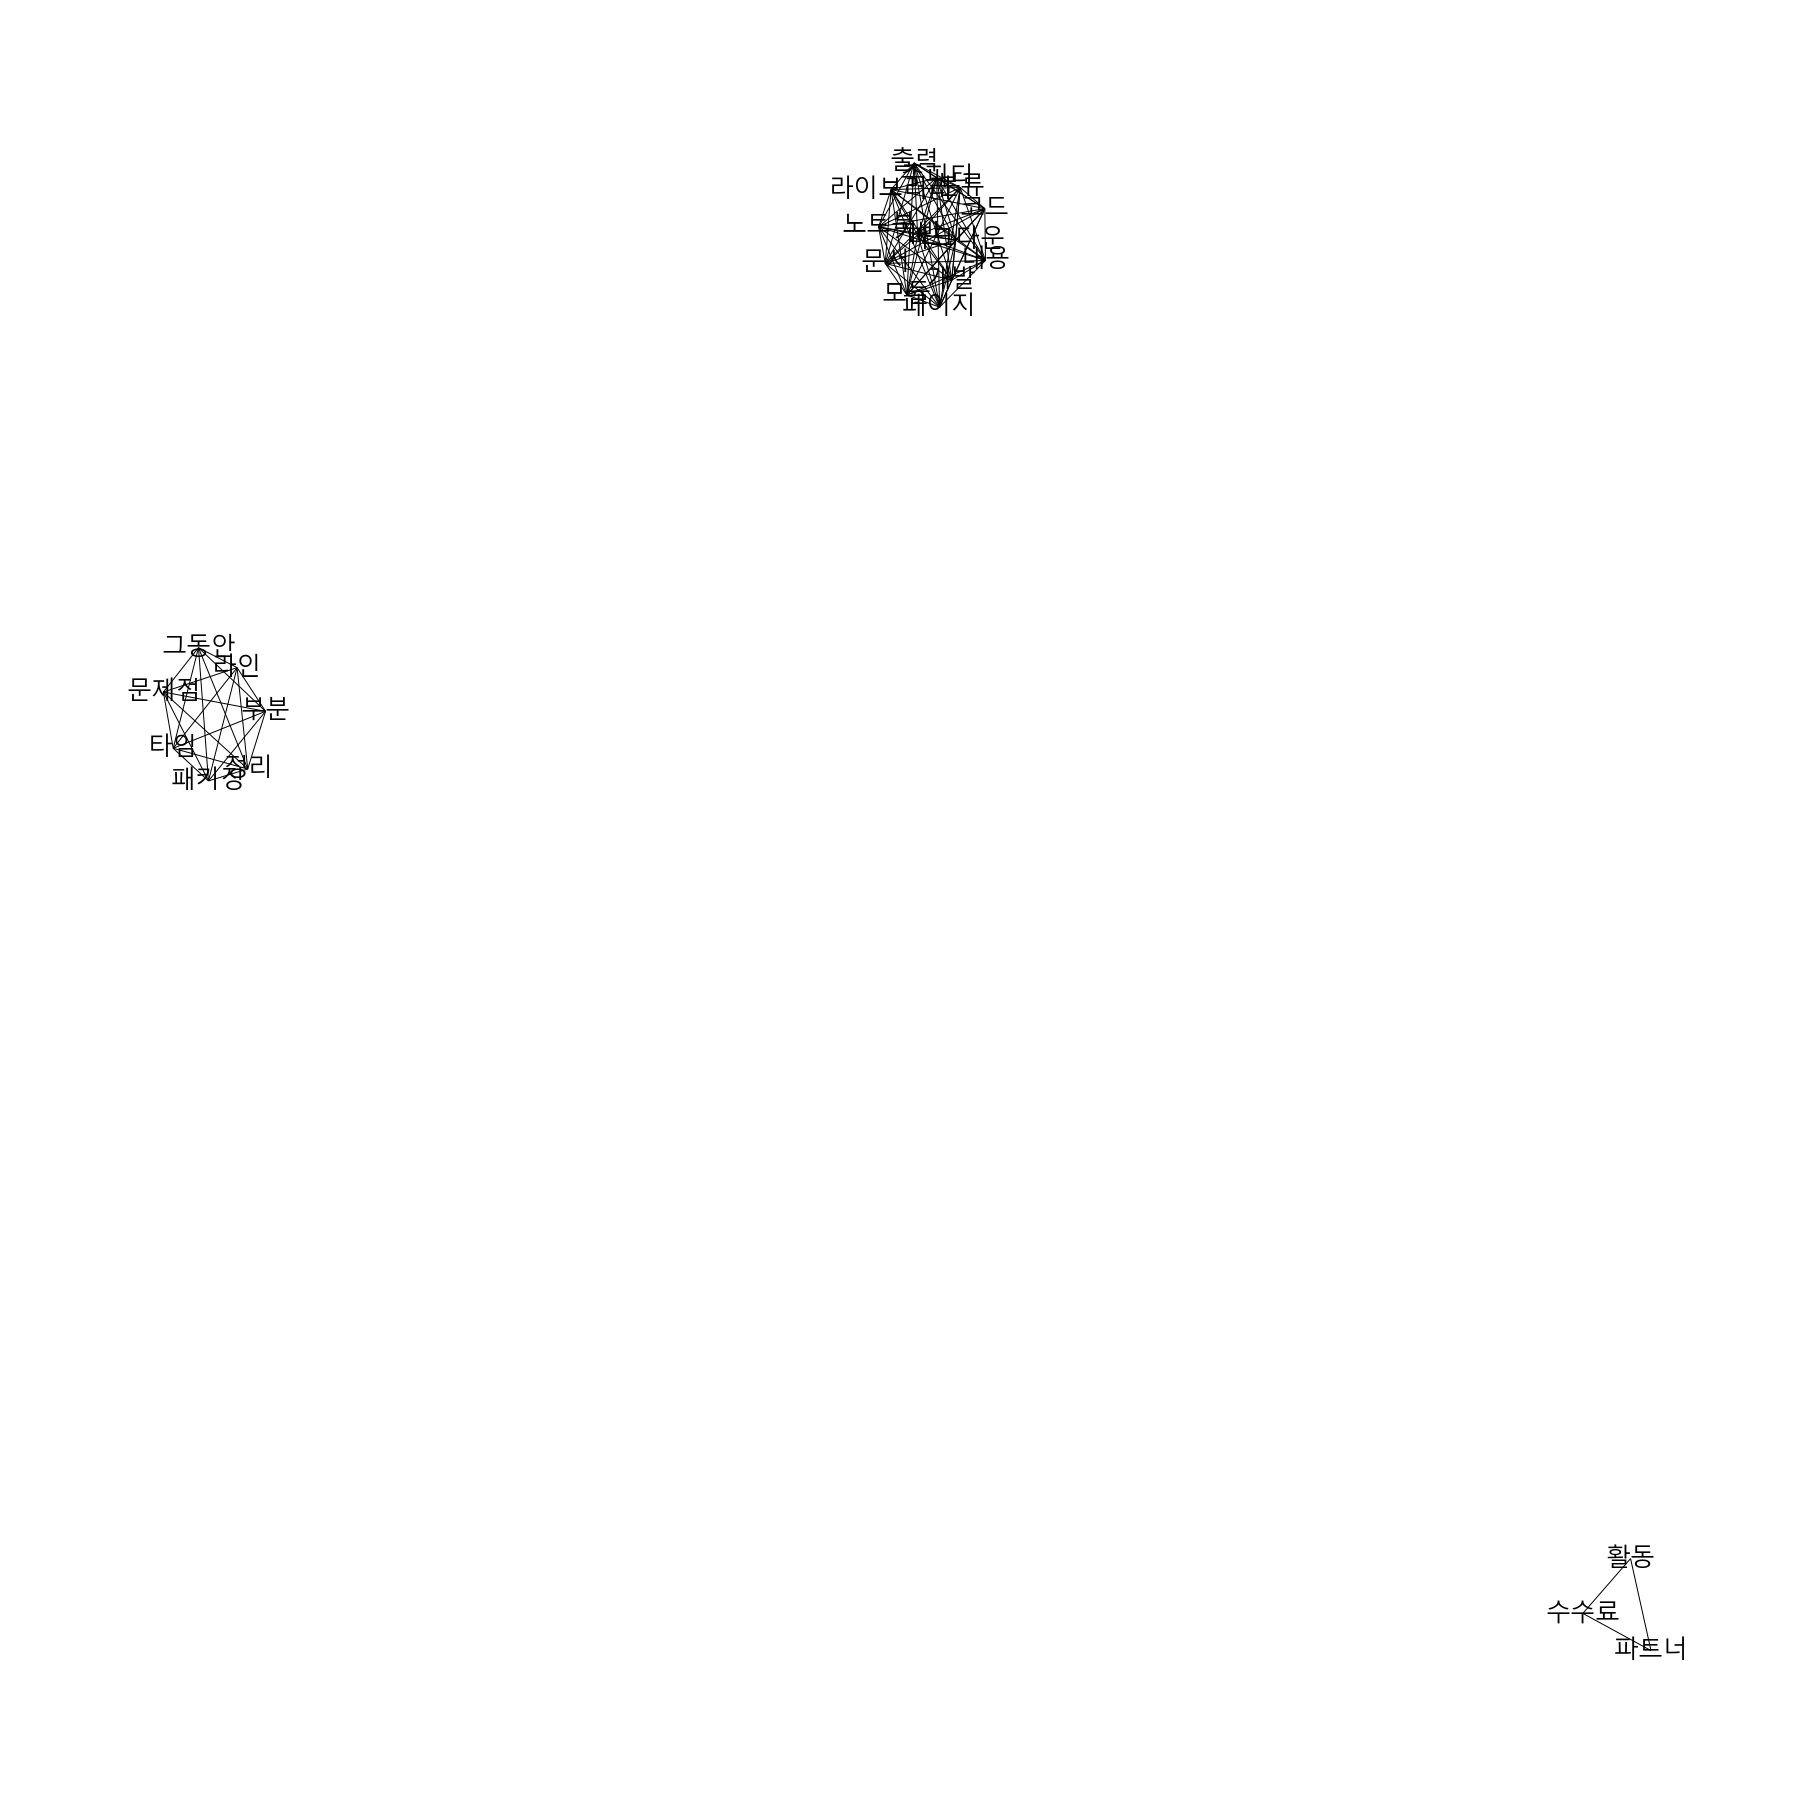

In [91]:
# !pip install networkx
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성
node_counter = Counter([noun for nouns in filtered_tweet_nouns for noun in nouns])
total_node = set()
for result in results:
    for node in result[0]:
        G.add_node(node)   

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
G.add_weighted_edges_from([(*result[0], 1/result[1]) for result in results])

# 그래프 디자인과 관련된 파라미터를 설정
pos = nx.spring_layout(G)
print(pos)
# nx.draw(G, pos=pos)
print([G.nodes[node] for node in G])
sizes = [G.nodes[node].get('nodesize', 0)*25 for node in G]
print(sizes)
nx.draw(G, pos=pos, node_size=sizes)


# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력
# nx.draw_networkx_labels(G, pos=pos, font_family='NanumGothic', font_size=25)
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력
ax = plt.gca()
plt.show()